# Гомография
## 1) взять код и сделать самостоятельно панараму больше чем на 2-х снимках,
## 2) взять код который занимается триангуляцией на основе афинной гомографии, придумать и реализовать метод автоматического триангулирования (по ключивым точкам лица с помошбю нейронки, взять шар и по окружности триангулировать) и приминить для своей фотографии.
код в виде архива и празантация


# Панарама

код взят из switching.py

In [ ]:
!pip install numpy==1.21.6 opencv-contrib-python==4.7.0.72 opencv-python==4.7.0.72 openpyxl==2.5.6 scipy matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

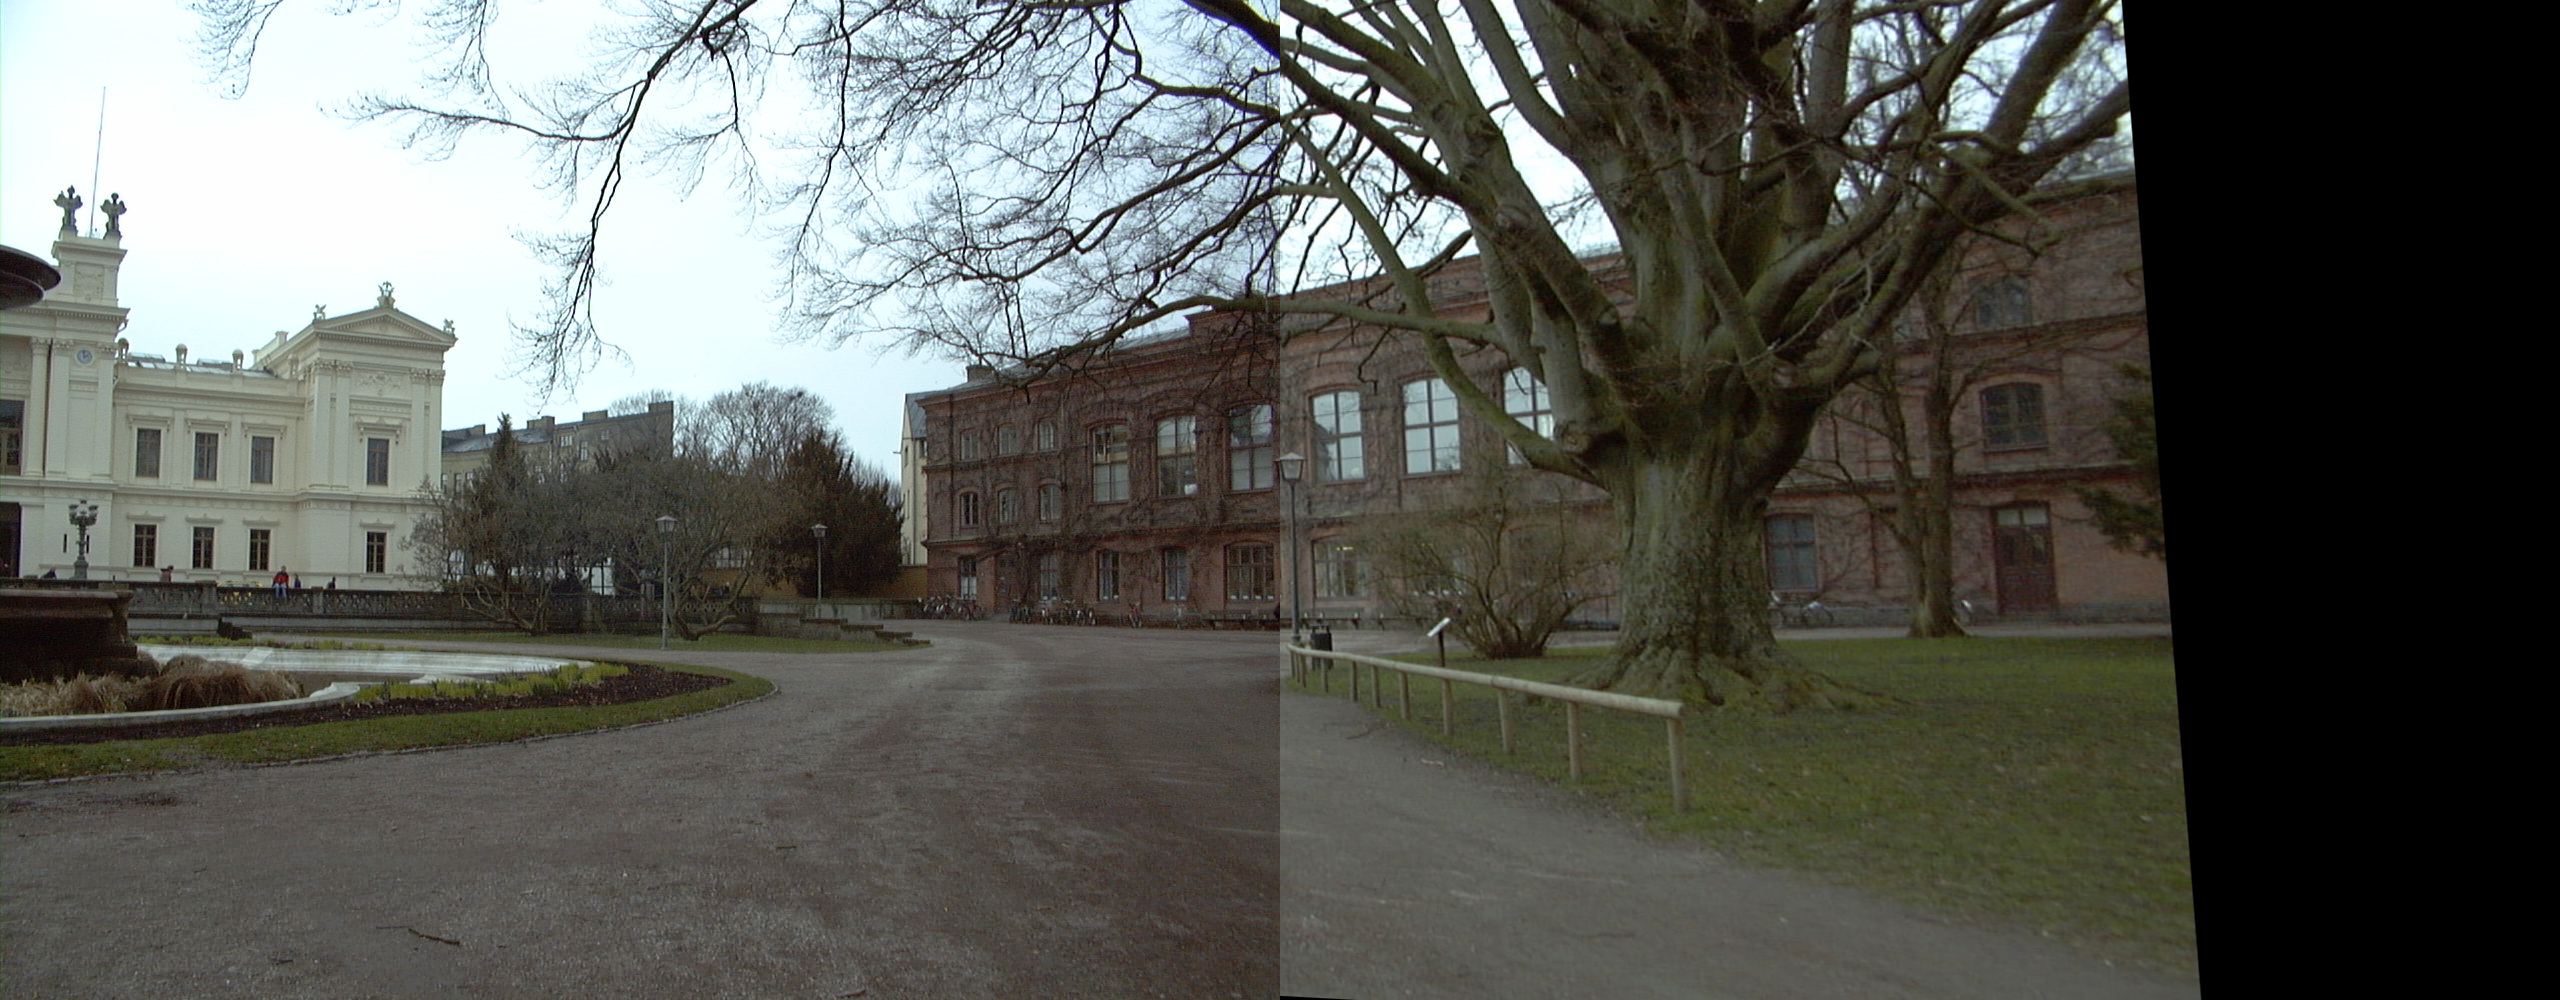

In [69]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Загрузка изображений
img1 = cv2.imread('/content/drive/MyDrive/Univ1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Univ2.jpg')

# Преобразование изображений в оттенки серого
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Инициализация объекта SIFT (определение ключевых точек)
sift = cv2.xfeatures2d.SIFT_create()

# Нахождение ключевых точек и дескрипторов на обоих изображениях
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Нахождение соответствий между дескрипторами на двух изображениях
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
matches = matcher.knnMatch(des1, des2, k=2)

# Фильтрация соответствий с помощью метрики Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Нахождение матрицы гомографии
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
# Преобразование изображений
panorama = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img2.shape[0]))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2

# Отображение результата
cv2_imshow(panorama)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def search_H(img1, img2):
    # Преобразование изображений в оттенки серого
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Инициализация объекта SIFT (определение ключевых точек)
    sift = cv2.xfeatures2d.SIFT_create()

    # Нахождение ключевых точек и дескрипторов на обоих изображениях
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # Нахождение соответствий между дескрипторами на двух изображениях
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    matches = matcher.knnMatch(des1, des2, k=2)

    # Фильтрация соответствий с помощью метрики Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Нахождение матрицы гомографии
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return H

def connect_to_left(img1, img2):
    H = search_H(img1, img2)
    # Преобразование изображений
    panorama = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img2.shape[0]))
    panorama[0:img2.shape[0], 0:img2.shape[1]] = img2
    return panorama


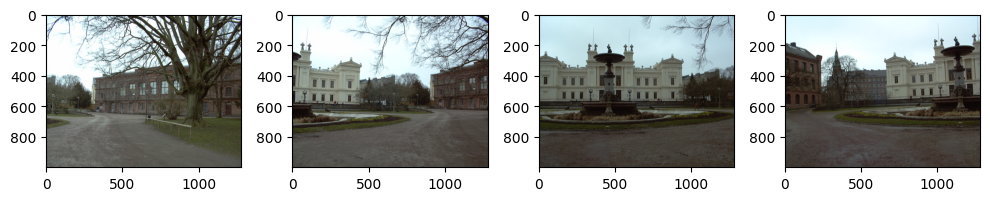

In [68]:

# Загрузка изображений
path1='/content/drive/MyDrive/Univ1.jpg'
path2='/content/drive/MyDrive/Univ2.jpg'
path3='/content/drive/MyDrive/Univ3.jpg'
path4='/content/drive/MyDrive/Univ4.jpg'
# '2_sem/6_labs/data/Univ5.jpg'

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, image_pat in enumerate([path1,path2,path3,path4]):
    image = plt.imread(image_pat)
    axs.flat[i].imshow(image)
plt.tight_layout()
plt.show()

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)

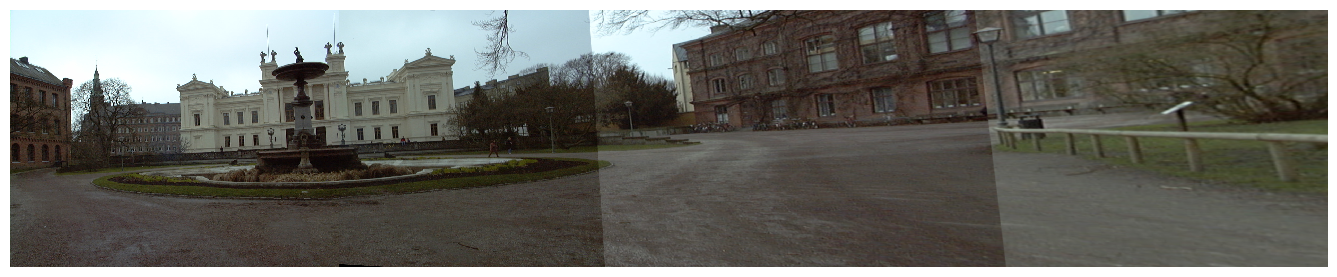

In [67]:
panorama = connect_to_left(img1,img2)
panorama = connect_to_left(panorama,img3 )
panorama = connect_to_left(panorama,img4)
plt.figure(figsize = (17,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB), interpolation='nearest')
